<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de identidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [2]:
seaborn.__version__

'0.9.0'

In [6]:
dataset = pandas.read_csv('./Datasets_AyVD_Diplodatos_2019/hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [7]:
dataset.columns  # Way too many columns!<


Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [8]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [7]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 
  3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

A. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.

In [8]:
important_cols

['year',
 'ISO_code',
 'countries',
 'region',
 'pf_identity_legal',
 'pf_identity_parental_marriage',
 'pf_identity_parental_divorce',
 'pf_identity_parental',
 'pf_identity_sex_male',
 'pf_identity_sex_female',
 'pf_identity_sex',
 'pf_identity_divorce',
 'pf_identity',
 'ef_score',
 'ef_rank',
 'hf_score',
 'hf_rank']

In [9]:
numeric_cols = [col for col in dataset[important_cols]._get_numeric_data()]

In [10]:
for col in dataset[numeric_cols]:
  max = dataset[col].describe(include='all')['max']
  min = dataset[col].describe(include='all')['min']
  range = max - min
  print('Nombre columna: '+ col+ " -- Max: "+ str(max) + "-- Min: "+ str(min)+ "-- Range: "+ str(range))


Nombre columna: year -- Max: 2016.0-- Min: 2008.0-- Range: 8.0
Nombre columna: pf_identity_legal -- Max: 10.0-- Min: 0.0-- Range: 10.0
Nombre columna: pf_identity_parental_marriage -- Max: 10.0-- Min: 0.0-- Range: 10.0
Nombre columna: pf_identity_parental_divorce -- Max: 10.0-- Min: 0.0-- Range: 10.0
Nombre columna: pf_identity_parental -- Max: 10.0-- Min: 0.0-- Range: 10.0
Nombre columna: pf_identity_sex_male -- Max: 10.0-- Min: 0.0-- Range: 10.0
Nombre columna: pf_identity_sex_female -- Max: 10.0-- Min: 0.0-- Range: 10.0
Nombre columna: pf_identity_sex -- Max: 10.0-- Min: 0.0-- Range: 10.0
Nombre columna: pf_identity_divorce -- Max: 10.0-- Min: 0.0-- Range: 10.0
Nombre columna: pf_identity -- Max: 10.0-- Min: 0.0-- Range: 10.0
Nombre columna: ef_score -- Max: 9.19-- Min: 2.88-- Range: 6.31
Nombre columna: ef_rank -- Max: 162.0-- Min: 1.0-- Range: 161.0
Nombre columna: hf_score -- Max: 9.126312939-- Min: 3.765826877-- Range: 5.360486062
Nombre columna: hf_rank -- Max: 162.0-- Min: 1.0

B. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda?

  1.   pf_identity_legal (Legal Gender)
  
  
  2.   pf_identity_parental (Parental rights)
       pf_identity_parental_marriage (Parental rights in marriage)
       pf_identity_parental_divorce (Parental rights after divorce)  
  
  
  3. pf_identity_sex Same-sex (relationships)
     pf_identity_sex_male Male-to-male (relationships)
     pf_identity_sex_female Female-to-female (relationships)
  
  
  4. pf_identity_divorce Divorce







In [11]:
from collections import Counter

pf_identity_hf_score_cols = [col for col in dataset.columns if 'pf_identity' in col]
pf_identity_hf_score_cols += ['hf_score']
data = []

for col in dataset[pf_identity_hf_score_cols]:
    meanWorld = dataset[col].mean()
    stdworld = dataset[col].std()
    medianWorld = dataset[col].median()
    modeWorld = Counter(dataset[col]).most_common(1)[0][0]
    meanLatin = dataset[dataset['region']=='Latin America & the Caribbean'][col].mean()
    stdLatin = dataset[dataset['region']=='Latin America & the Caribbean'][col].std()
    medianlatin = dataset[dataset['region']=='Latin America & the Caribbean'][col].median()
    modeLatin = Counter(dataset[dataset['region']=='Latin America & the Caribbean'][col]).most_common(1)[0][0]
    data.append([meanLatin,stdLatin ,medianlatin, modeLatin,meanWorld,stdworld,medianWorld, modeWorld])
    
    

pandas.DataFrame(data,pf_identity_hf_score_cols, ['Mean Latin', 'Std latin', 'Median Latin', 'Mode Latin','Mean World', 'std World', 'Median World', 'Mode World'])
    

,Mean Latin,Std latin,Median Latin,Mode Latin,Mean World,std World,Median World,Mode World
pf_identity_legal,3.850000,4.817436,0.000000,0.000000,6.307317,3.635095,7.000000,7.00000
pf_identity_parental_marriage,8.933333,2.497426,10.000000,10.000000,7.248104,3.953387,10.000000,10.00000
pf_identity_parental_divorce,9.333333,2.061688,10.000000,10.000000,7.632719,3.689772,10.000000,10.00000
pf_identity_parental,9.282511,1.880677,10.000000,10.000000,7.428203,3.705913,10.000000,10.00000
pf_identity_sex_male,7.974138,4.027957,10.000000,10.000000,6.709091,4.683089,10.000000,10.00000
pf_identity_sex_female,9.224138,2.680977,10.000000,10.000000,7.935414,4.028877,10.000000,10.00000
pf_identity_sex,8.599138,2.993297,10.000000,10.000000,7.325835,4.048606,10.000000,10.00000
pf_identity_divorce,10.000000,0.000000,10.000000,10.000000,7.538462,3.644142,10.000000,10.00000
pf_identity,8.765086,1.711732,10.000000,10.000000,7.334180,3.159473,9.166667,10.00000
hf_score,7.047982,0.608904,7.028045,6.469848,6.993444,1.025811,6.923840,7.56814


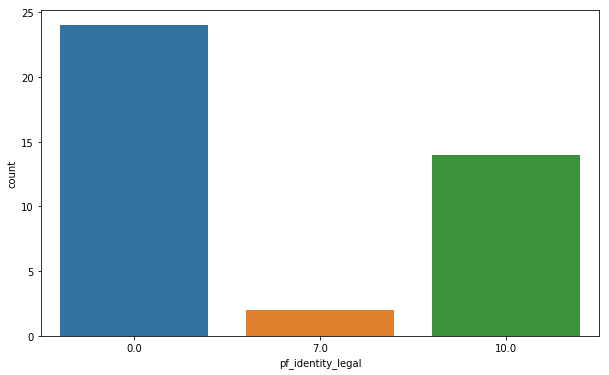

In [16]:
plt.figure(figsize=(10,6))
seaborn.countplot(data=dataset[dataset['region']=='Latin America & the Caribbean'], x='pf_identity_legal')

In [13]:
#dataset['pf_identity_legal'].describe()
totalCountdata = []
for col in dataset[pf_identity_hf_score_cols]:
    count_world = dataset[col].count()
    total_world = len(dataset[col])
    nulos_world = total_world - count_world
    count_lat = dataset[dataset['region']=='Latin America & the Caribbean'][col].count()
    total_lat = len(dataset[dataset['region']=='Latin America & the Caribbean'][col])
    nulos_lat = total_lat - count_lat
    totalCountdata.append([count_world,nulos_world, total_world, count_lat, nulos_lat, total_lat])
    
    
    

pandas.DataFrame(totalCountdata,pf_identity_hf_score_cols, ['No Nulos','Nulos','Total', 'No Nulos LAT','Nulos LAT','Total LAT'])

,No Nulos,Nulos,Total,No Nulos LAT,Nulos LAT,Total LAT
pf_identity_legal,205,1253,1458,40,194,234
pf_identity_parental_marriage,923,535,1458,150,84,234
pf_identity_parental_divorce,923,535,1458,150,84,234
pf_identity_parental,1358,100,1458,223,11,234
pf_identity_sex_male,1375,83,1458,232,2,234
pf_identity_sex_female,1378,80,1458,232,2,234
pf_identity_sex,1378,80,1458,232,2,234
pf_identity_divorce,585,873,1458,84,150,234
pf_identity,1378,80,1458,232,2,234
hf_score,1378,80,1458,232,2,234


In [14]:
dataset['hf_score']

0       7.568140
1       5.135886
2       5.640662
3       6.469848
4       7.241402
5       8.582219
6       8.413474
7       6.083277
8       7.397269
9       6.848035
10      5.801300
11      7.068447
12      6.144514
13      8.153589
14      7.145432
15      6.738488
16      6.810486
17      6.718385
18      7.230724
19      7.153167
20      6.207989
21      5.796850
22      7.782770
23      6.752670
24      5.167067
25      7.204224
26      5.575387
27      8.565863
28      7.333292
29      5.287816
          ...   
1428    7.825762
1429    6.762374
1430    8.247249
1431    5.860377
1432         NaN
1433         NaN
1434         NaN
1435    8.452347
1436    8.774437
1437    5.457516
1438    7.792327
1439         NaN
1440    6.338606
1441    7.274283
1442         NaN
1443    5.763365
1444    6.805600
1445    6.249058
1446    6.918409
1447    6.495271
1448    6.798697
1449    6.784866
1450    8.536421
1451    8.448265
1452    7.947847
1453    5.257879
1454    6.420206
1455         N

In [17]:
dataset['hf_score'].replace(numpy.nan, dataset['hf_score'].median())
dataset['hf_score'].describe()



count    1378.000000
mean        6.993444
std         1.025811
min         3.765827
25%         6.336685
50%         6.923840
75%         7.894660
max         9.126313
Name: hf_score, dtype: float64

In [ ]:
dataset['hf_score']

1. ¿Son todos los valores de pf_identity y hf_score directamente comparables? ¿Qué otra variable podría influenciarlos?


2. ¿Cómo pueden sanearse los valores faltantes?
https://www.oreilly.com/learning/handling-missing-data

3. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?

In [18]:
[dataset[col].unique() for col in dataset[pf_identity_hf_score_cols]]

[array([ 0., nan, 10.,  7.]),
 array([10.,  0., nan,  5.]),
 array([10.,  5.,  0., nan]),
 array([10. ,  2.5,  0. ,  5. ,  7.5,  nan]),
 array([10.,  0.,  5., nan]),
 array([10.,  0.,  5., nan]),
 array([10.,  0.,  5., nan]),
 array([ 5.,  0., 10., nan]),
 array([ 6.25      ,  0.83333333,  7.5       , 10.        ,  8.        ,
         9.25      ,  3.33333333,  1.25      ,  5.        ,  3.75      ,
         4.25      ,  1.66666667,  5.83333333,  8.33333333,  9.16666667,
         6.875     ,  0.        ,  6.66666667,  6.75      ,  5.5       ,
         3.        ,  5.625     ,  4.16666667,  9.        ,  4.375     ,
         9.375     ,  2.5       ,  1.75      ,  4.875     ,  8.75      ,
                nan]),
 array([7.56814029, 5.13588606, 5.64066218, ..., 6.42020631, 6.64772441,
        4.93557073])]

**OUTLIERS**

/home/lucia/anaconda3/envs/diplodatos/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


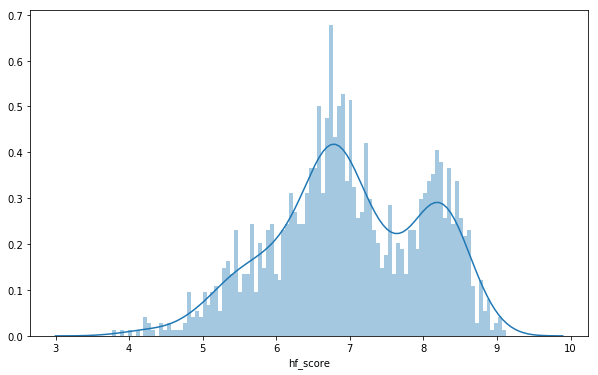

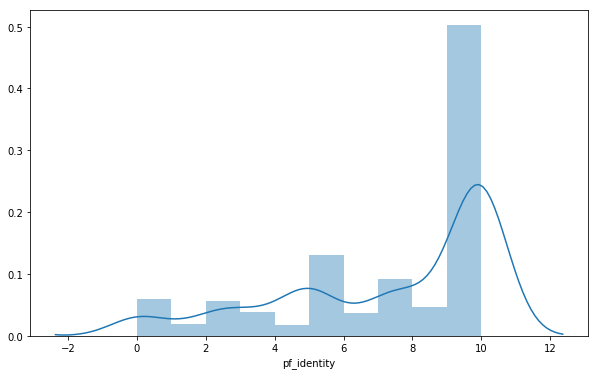

In [19]:
plt.figure(figsize=(10,6))
seaborn.distplot(dataset['hf_score'].dropna(), bins=100)
plt.figure(figsize=(10,6))
seaborn.distplot(dataset['pf_identity'].dropna(), bins=10)


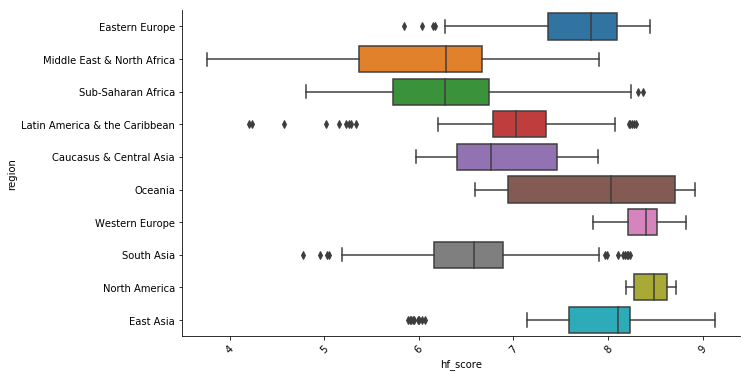

In [20]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=dataset,
                x='hf_score', y='region')
plt.ylabel('region')
plt.xlabel('hf_score')
plt.xticks(rotation=45)
seaborn.despine()

(array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 8 Text xticklabel objects>)

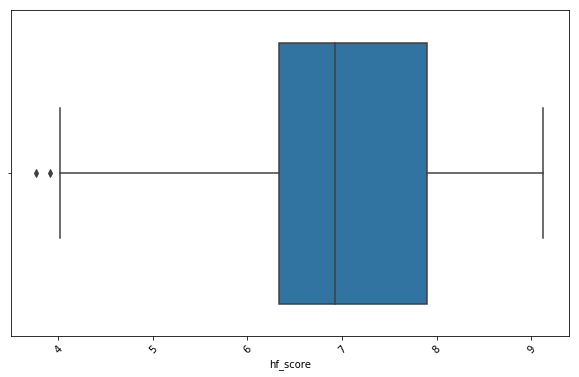

In [21]:
plt.figure(figsize=(10,6))
seaborn.boxplot(x=dataset['hf_score'])
plt.xlabel('hf_score')
plt.xticks(rotation=45)
#seaborn.despine()

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 8 Text xticklabel objects>)

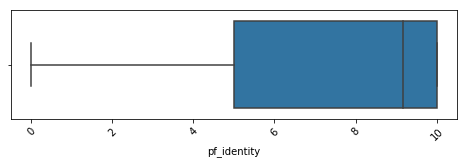

In [22]:
plt.figure(figsize=(8,2))
seaborn.boxplot(x=dataset['pf_identity'])
plt.xlabel('pf_identity')
plt.xticks(rotation=45)

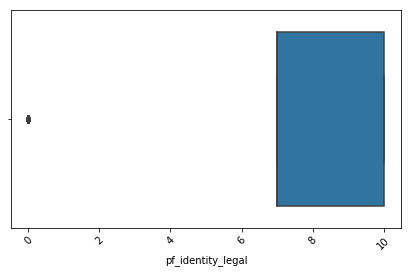

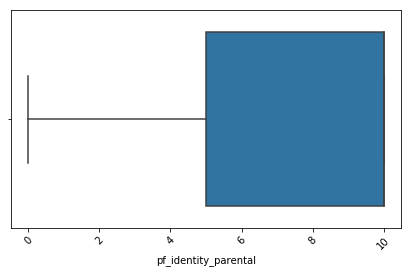

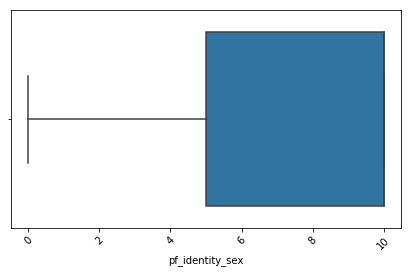

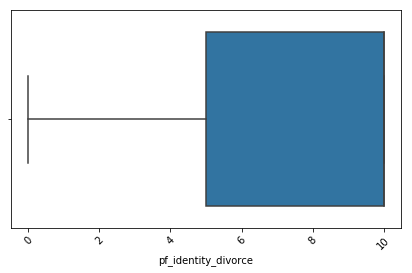

In [23]:
col_name = ['pf_identity_legal',
 'pf_identity_parental',
 'pf_identity_sex',
 'pf_identity_divorce']
for col in col_name:
  plt.figure(figsize=(7,4))
  seaborn.boxplot(x=dataset[col])
  plt.xlabel(col)
  plt.xticks(rotation=45)



In [24]:
hf_score = dataset['hf_score']
pf_score = dataset['hf_score']

# Eliminar filas a más de 2.5 desviaciones estándares de la medi
#hf_score_sin = numpy.abs(hf_score-hf_score.mean()) <= (2*hf_score.std())
#data = hf_score[hf_score_sin]
##print("Filas removidas", hf_score.count() - data.count())
#print("hf_score máximo considerado", data.max())

2. Agregación de datos
Grafiquen la media de la variable pf_identity y hf_score a través de los años.
Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable pf_identity en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?
Hint: hay un gráfico de seaborn que hace todo por vos!

Sólo por curiosidad, graficar la tendencia de hf_score y ef_score a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

### Grafiquen la ***media*** de la variable pf_identity y hf_score a través de los años

En este punto hay que graficar la media, no los datos completos 

In [25]:
median_Word=dataset[important_cols]
median_Word.groupby('year').median()

,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
year,,,,,,,,,,,,,
2008,NaN,NaN,NaN,10.0,10.0,10.0,10.0,NaN,10.000000,6.830,70.0,7.005013,70.0
2009,NaN,NaN,NaN,10.0,10.0,10.0,10.0,NaN,10.000000,6.900,70.0,6.995549,70.0
2010,NaN,NaN,NaN,10.0,10.0,10.0,10.0,NaN,10.000000,6.850,77.0,6.949657,77.0
2011,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,6.920,77.0,6.987844,75.0
2012,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,6.920,77.0,6.926985,77.0
2013,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,8.333333,6.950,78.0,6.907810,79.0
2014,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.166667,6.960,80.0,6.903895,80.0
2015,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,8.000000,6.870,80.0,6.840998,80.0
2016,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,8.000000,6.905,81.5,6.823996,81.5


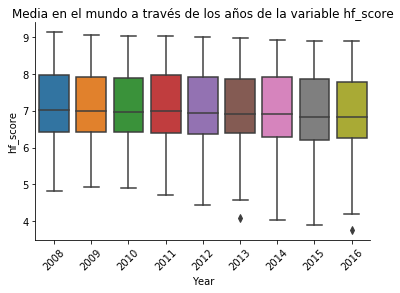

In [26]:
seaborn.boxplot(data=median_Word,
                x='year', y='hf_score')
plt.ylabel('hf_score')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.title('Media en el mundo a través de los años de la variable hf_score')
seaborn.despine()



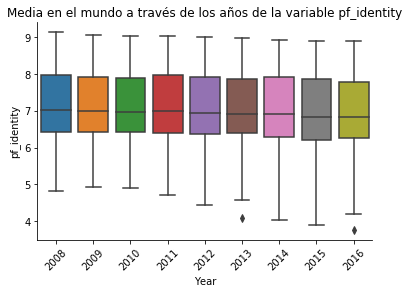

In [124]:
seaborn.boxplot(data=median_Word,
                x='year', y='hf_score')
plt.ylabel('pf_identity')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.title('Media en el mundo a través de los años de la variable pf_identity')
seaborn.despine()

In [138]:
Median_regions=df1_median.groupby(['region','year'])
Median_regions.median()


pf_identity_legal  \
region                        year                      
Caucasus & Central Asia       2008                NaN   
                              2009                NaN   
                              2010                NaN   
                              2011                NaN   
                              2012                NaN   
                              2013                NaN   
                              2014                NaN   
                              2015                7.0   
                              2016                7.0   
East Asia                     2008                NaN   
                              2009                NaN   
                              2010                NaN   
                              2011                NaN   
                              2012                NaN   
                              2013                NaN   
                              2014                NaN   
                              2015                7.0   
                              2016                7.0   
Eastern Europe                2008                NaN   
                              2009                NaN   
                              2010                NaN   
                              2011                NaN   
                              2012                NaN   
                              2013                NaN   
                              2014                NaN   
                              2015                7.0   
                              2016                7.0   
Latin America & the Caribbean 2008                NaN   
                              2009                NaN   
                              2010                NaN   
...                                               ...   
Oceania                       2014                NaN   
                              2015                7.0   
                              2016                7.0   
South Asia                    2008                NaN   
                              2009                NaN   
                              2010                NaN   
                              2011                NaN   
                              2012                NaN   
                              2013                NaN   
                              2014                NaN   
                              2015                7.0   
                              2016                7.0   
Sub-Saharan Africa            2008                NaN   
                              2009                NaN   
                              2010                NaN   
                              2011                NaN   
                              2012                NaN   
                              2013                NaN   
                              2014                NaN   
                              2015                7.0   
                              2016                7.0   
Western Europe                2008                NaN   
                              2009                NaN   
                              2010                NaN   
                              2011                NaN   
                              2012                NaN   
                              2013                NaN   
                              2014                NaN   
                              2015                7.0   
                              2016                7.0   

                                    pf_identity_parental_marriage  \
region                        year                                  
Caucasus & Central Asia       2008                            NaN   
                              2009                            NaN   
                              2010                            NaN   
                              2011                           10.0   
                              

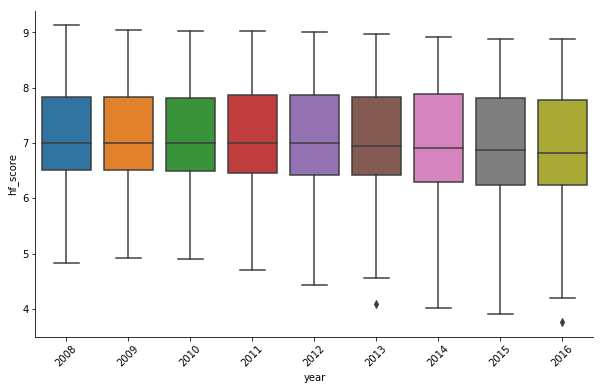

In [0]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=dataset,
                x='year', y='hf_score')
plt.ylabel('hf_score')
plt.xlabel('Year')
plt.xticks(rotation=45)
seaborn.despine()


Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones? Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable pf_identity en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia? Hint: hay un gráfico de seaborn que hace todo por vos!

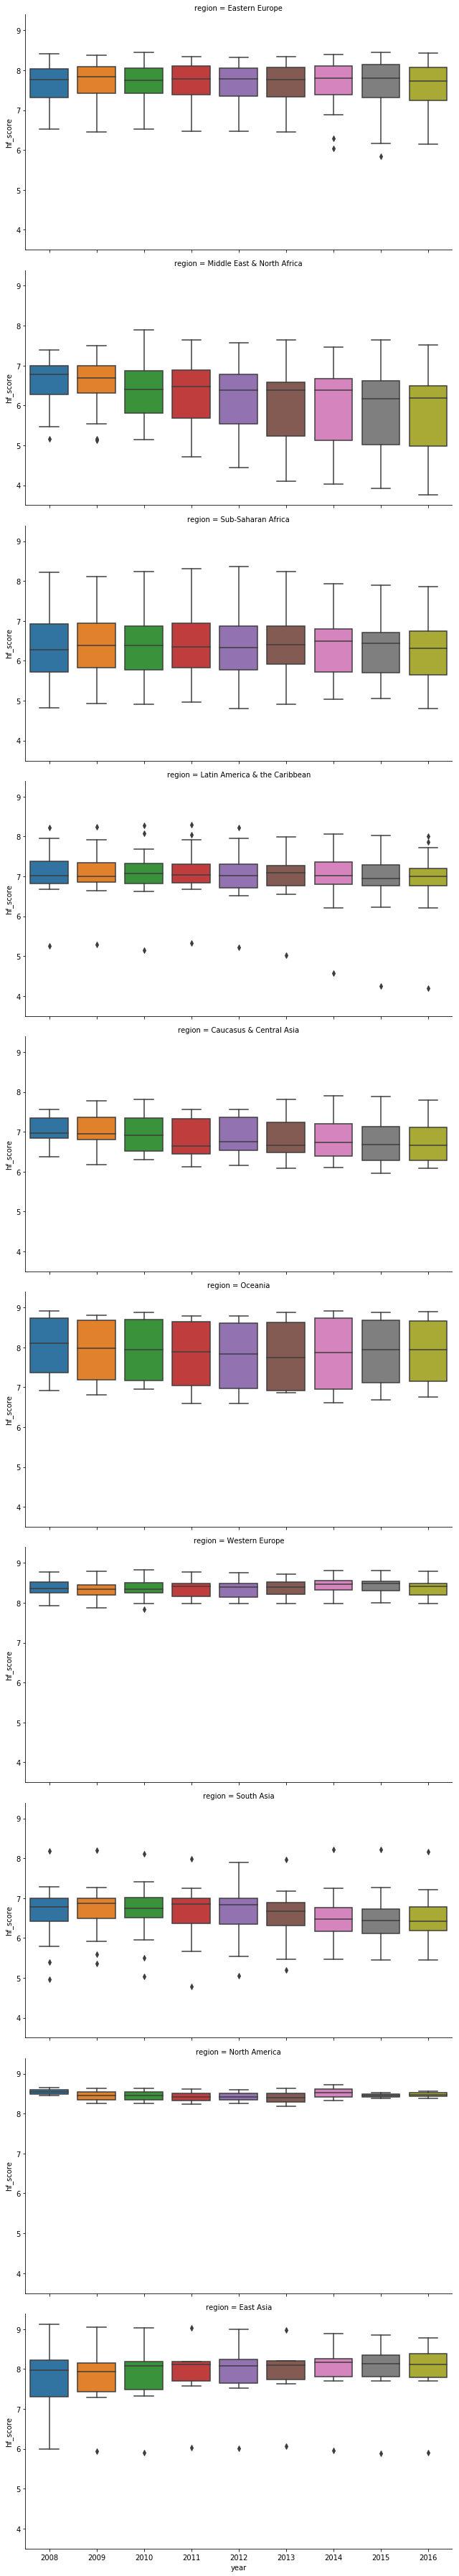

In [0]:
g = seaborn.catplot(
    data=dataset, x='year', y='hf_score',
     row='region',
    kind='box',
    aspect=1.8)

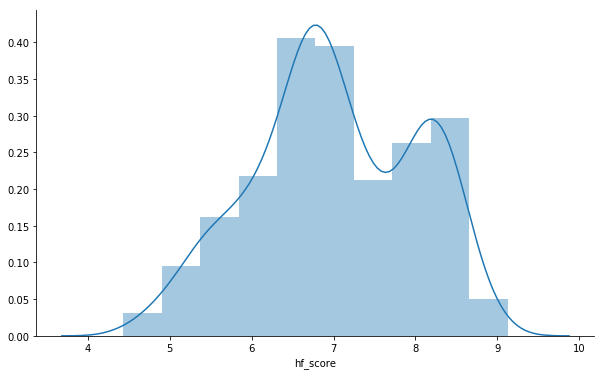

In [0]:
plt.figure(figsize=(10,6))
seaborn.distplot(data, bins=10)
seaborn.despine()

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Hint: hay un gráfico de seaborn que hace todo por vos!

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

## 3. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?
  2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.
  3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
  4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

In [34]:
Important_columns=dataset[important_cols]
pf_identity=dataset[pf_identity]
Important_columns

NameError: name 'pf_identity' is not defined

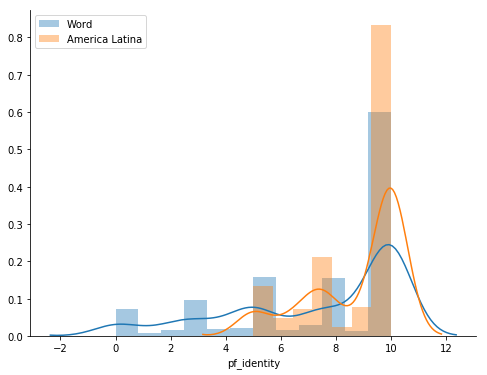

In [31]:
plt.figure(figsize=(8,6))
seaborn.distplot(Important_columns['pf_identity'].dropna(),label='Word')
seaborn.distplot(Important_columns[Important_columns['region']=='Latin America & the Caribbean']['pf_identity'].dropna(), label='America Latina')
plt.legend()
seaborn.despine()

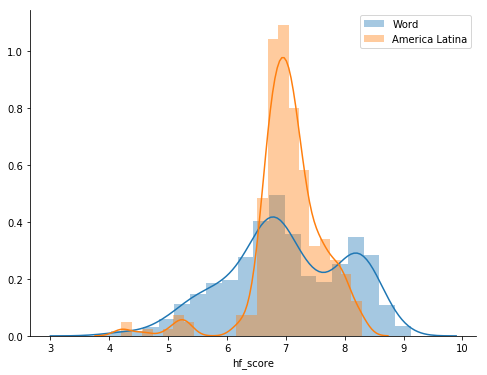

In [176]:
plt.figure(figsize=(8,6))
seaborn.distplot(Important_columns['hf_score'].dropna(),label='Word')
seaborn.distplot(Important_columns[Important_columns['region']=='Latin America & the Caribbean']['hf_score'].dropna(), label='America Latina')
plt.legend()
seaborn.despine()

In [ ]:
from scipy import stats

## 3. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.
3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)


In [28]:
s = pandas.Series([2, 2, 2, None])
s.describe()

count    3.0
mean     2.0
std      0.0
min      2.0
25%      2.0
50%      2.0
75%      2.0
max      2.0
dtype: float64

In [41]:
#correlaciones entre las variables pf_identity, hf_score y ef_score
Important_columns=dataset[important_cols]
ef_score = dataset['ef_score']
hf_score = dataset['hf_score']
pf_identity = dataset['pf_identity']


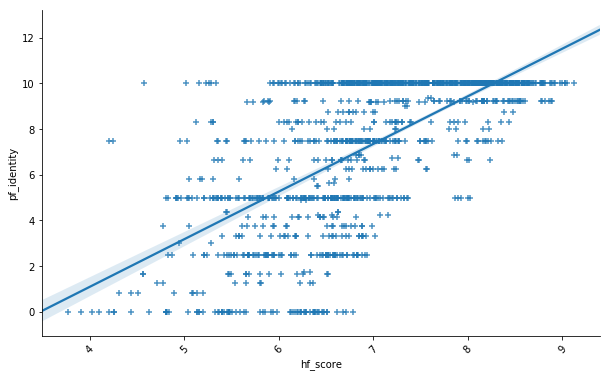

In [42]:
#correlaciones entre las variables pf_identity, hf_score 
plt.figure(figsize=(10,6))
seaborn.regplot(data=Important_columns,
                x=hf_score, y=pf_identity,
                marker='+')
plt.xticks(rotation=45)
seaborn.despine()



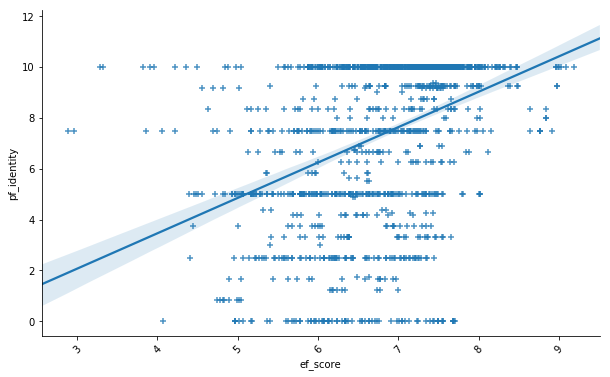

In [40]:
#correlaciones entre las variables ef_score y pf_identity
plt.figure(figsize=(10,6))
seaborn.regplot(data=Important_columns,
                x=ef_score, y=pf_identity,
                marker='+')
plt.xticks(rotation=45)
seaborn.despine()


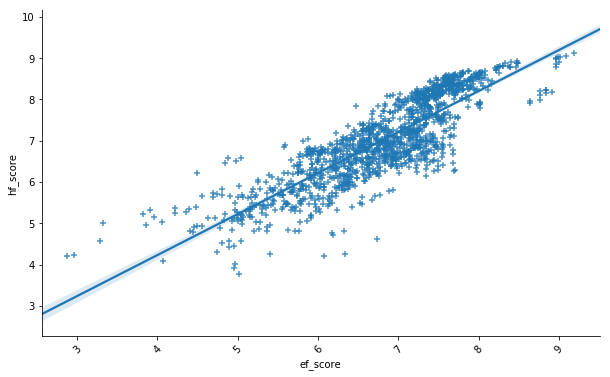

In [43]:
#correlaciones entre las variables ef_score y hf_score
plt.figure(figsize=(10,6))
seaborn.regplot(data=Important_columns,
                x=ef_score, y=hf_score,
                marker='+')
plt.xticks(rotation=45)
seaborn.despine()


<Figure size 720x432 with 0 Axes>

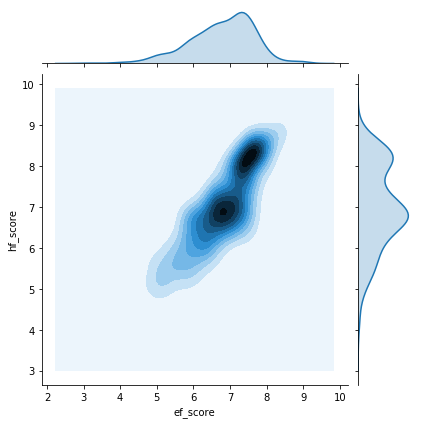

In [33]:

plt.figure(figsize=(10,6))
seaborn.jointplot(data=Important_columns,
                  x=ef_score, y=hf_score, kind='kde')